모수 검정

### 0.데이터 다운로드

In [1]:
!git clone https://github.com/Soyoung-Yoon/data_02

fatal: destination path 'data_02' already exists and is not an empty directory.


In [2]:
!git clone https://github.com/Soyoung-Yoon/bigdata

fatal: destination path 'bigdata' already exists and is not an empty directory.


In [3]:
import scipy
scipy.__version__

'1.10.1'

In [ ]:
!pip install scipy==1.6.0

### 1.정규성 검정(Normality Test)
- 귀무가설 - 데이터셋이 정규분포를 따른다
- 대립가설 - 데이터셋이 정규분포를 따르지 않는다
- 유의수준 0.05 인 경우 : p-value > 0.05, 정규성이 보장된다고 할 수 있다
- 검정통계량 < 임계값, 정규성이 보장된다고 할 수 있다

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('./data_02/sleepage.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   stime20s  20 non-null     int64
 1   stime40s  20 non-null     int64
 2   ID        20 non-null     int64
dtypes: int64(3)
memory usage: 608.0 bytes


In [2]:
data.shape

(20, 3)

In [3]:
data.head(2)

,stime20s,stime40s,ID
0,4,5,1
1,4,5,2


In [14]:
# 그룹을 나누어 저장함
stime20s = data['stime20s']
stime40s = data['stime40s']

In [15]:
# 정규성 검정 - 1 shapiro wilks test 
from scipy.stats import shapiro

for name, stime in zip(['20s', '40s'], [stime20s, stime20s]):
    s, pvalue = shapiro(stime)
    print(f'[shapiro-wilk] {name} statistics= {s:,.4f}, p-value= {pvalue:,.4f} -> {"H₀기각" if pvalue < 0.05 else "H₀채택"}')

[shapiro-wilk] 20s statistics= 0.9239, p-value= 0.1180 -> H₀채택
[shapiro-wilk] 40s statistics= 0.9239, p-value= 0.1180 -> H₀채택


In [17]:
# 정규성 검정 - 2 kstest(kolmogorov-smirnov test)
# 두 개의 데이터가 같은 분포인지 아닌지 검정
# 귀무가설 : 두집단의 분포가 같다
# 대립가설 : 두집단의 분포가 다르다
from scipy.stats import kstest

for name, stime in zip(['20s', '40s'], [stime20s, stime20s]):
    s, pvalue = kstest(stime, 'norm')
    print(f'[kstest] {name} statistics= {s:,.4f}, p-value= {pvalue:,.4f} -> {"H₀기각" if pvalue < 0.05 else "H₀채택"}')

[kstest] 20s statistics= 0.9987, p-value= 0.0000 -> H₀기각
[kstest] 40s statistics= 0.9987, p-value= 0.0000 -> H₀기각


In [22]:
# 정규성 검정 - 3 normaltest  (20개 이상의 데이터 필요)  # 20개입니다!
from scipy.stats import normaltest

for name, stime in zip(['20s', '40s'], [stime20s, stime20s]):
    s, pvalue = normaltest(stime)
    print(f'[normaltest] {name} statistics= {s:,.4f}, p-value= {pvalue:,.4f} -> {"H₀기각" if pvalue < 0.05 else "H₀채택"}')

[normaltest] 20s statistics= 1.1732, p-value= 0.5562 -> H₀채택
[normaltest] 40s statistics= 1.1732, p-value= 0.5562 -> H₀채택


In [30]:
# 정규성 검정 - 4 anderson darling test
# 검정통계량 < 임계값, 정규성이 보장된다고 할 수 있다
from scipy.stats import anderson

for name, stime in zip(['20s', '40s'], [stime20s, stime20s]):
    r = anderson(stime)
    print(f'[anderson] {name} result=', *r)

[anderson] 20s result= 0.5601097602856164 [0.506 0.577 0.692 0.807 0.96 ] [15.  10.   5.   2.5  1. ]
[anderson] 40s result= 0.5601097602856164 [0.506 0.577 0.692 0.807 0.96 ] [15.  10.   5.   2.5  1. ]


### 2.등분산성 검정
- burtlett : 데이터셋의 크기가 서로 다른 2개 이상의 집단 사용 가능
- levene, fligner : 정규성을 충족하지 않는 비모수 데이터에 대해서도 사용가능 (중앙을 median으로 설정)

#### 2-1.iris 데이터
- 등분산 검정 - 3가지 방법으로 실행 후, pvalue 확인

In [31]:
# 파일 읽어와 내용 확인
import seaborn as sns

iris = sns.load_dataset('iris')
iris.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [32]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [33]:
# [1] target='sepal_length', 품종별 그룹을 나누어 저장함
feature = 'sepal_length'
iris.groupby('species')[feature].mean()

species
setosa        5.006
versicolor    5.936
virginica     6.588
Name: sepal_length, dtype: float64

In [38]:
data = [x for x in iris.groupby('species')[feature]]

from scipy.stats import shapiro, kstest, normaltest, anderson

for name, x in data:
    print('name=', name)
    s, pvalue = shapiro(x)
    print(f'  [shapiro] {name} statistics= {s:,.4f}, p-value= {pvalue:,.4f} -> {"H₀기각" if pvalue < 0.05 else "H₀채택"}')
    
    s, pvalue = kstest(x, 'norm')
    print(f'  [kstest] {name} statistics= {s:,.4f}, p-value= {pvalue:,.4f} -> {"H₀기각" if pvalue < 0.05 else "H₀채택"}')    
    
    s, pvalue = normaltest(x)
    print(f'  [normaltest] {name} statistics= {s:,.4f}, p-value= {pvalue:,.4f} -> {"H₀기각" if pvalue < 0.05 else "H₀채택"}')    
    
    r = anderson(x)
    print(f'  [anderson] {name} result= ', *r)    

name= setosa
  [shapiro] setosa statistics= 0.9777, p-value= 0.4595 -> H₀채택
  [kstest] setosa statistics= 1.0000, p-value= 0.0000 -> H₀기각
  [normaltest] setosa statistics= 0.1942, p-value= 0.9075 -> H₀채택
  [anderson] setosa result=  0.4079859754958619 [0.538 0.613 0.736 0.858 1.021] [15.  10.   5.   2.5  1. ]
name= versicolor
  [shapiro] versicolor statistics= 0.9778, p-value= 0.4647 -> H₀채택
  [kstest] versicolor statistics= 1.0000, p-value= 0.0000 -> H₀기각
  [normaltest] versicolor statistics= 0.8414, p-value= 0.6566 -> H₀채택
  [anderson] versicolor result=  0.360841172628966 [0.538 0.613 0.736 0.858 1.021] [15.  10.   5.   2.5  1. ]
name= virginica
  [shapiro] virginica statistics= 0.9712, p-value= 0.2583 -> H₀채택
  [kstest] virginica statistics= 1.0000, p-value= 0.0000 -> H₀기각
  [normaltest] virginica statistics= 0.2089, p-value= 0.9008 -> H₀채택
  [anderson] virginica result=  0.5516407106574732 [0.538 0.613 0.736 0.858 1.021] [15.  10.   5.   2.5  1. ]


In [40]:
# [2] burtlett 검정
data = [x.values for _, x in iris.groupby('species')[feature]]

from scipy.stats import bartlett

s, pvalue = bartlett(*data)
print(f'[bartlett] statistics= {s:,.4f}, p-value= {pvalue:,.4f} -> {"H₀기각" if pvalue < 0.05 else "H₀채택"}')

[bartlett] statistics= 16.0057, p-value= 0.0003 -> H₀기각


In [41]:
# [3] levene 의 center는 'mean'으로 지정
from scipy.stats import levene

s, pvalue = levene(*data, center='mean')
print(f'[levene] statistics= {s:,.4f}, p-value= {pvalue:,.4f} -> {"H₀기각" if pvalue < 0.05 else "H₀채택"}')

[levene] statistics= 7.3811, p-value= 0.0009 -> H₀기각


In [43]:
# [4] fligner의 center는 'trimmed', proportiontocut=5% 지정
from scipy.stats import fligner

s, pvalue = fligner(*data, center='mean', proportiontocut=0.05)
print(f'[fligner] statistics= {s:,.4f}, p-value= {pvalue:,.4f} -> {"H₀기각" if pvalue < 0.05 else "H₀채택"}')

[fligner] statistics= 13.2561, p-value= 0.0013 -> H₀기각


In [55]:
data = [x for x in iris.groupby('species')[feature]]

for name, d in data:
    print(f'{name:10s} - var: {d.var():.4}')

setosa     - var: 0.1242
versicolor - var: 0.2664
virginica  - var: 0.4043


#### 2-2.tips 데이터
- 요일별 total_bill 의 등분산성 검정
- levene의 median, trimmed 사용

In [56]:
# 파일 읽어와 내용 확인
import seaborn as sns

tips = sns.load_dataset('tips')
tips.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


In [57]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [62]:
# [1] target = 'total_bill', 요일별 그룹을 나누어 저장함
feature = 'total_bill'
data = [x for x in tips.groupby('day')[feature]]

for name, x in data:
    print(f'{name} - var: {x.var():,.4f}')

Thur - var: 62.1917
Fri - var: 68.9342
Sat - var: 89.8783
Sun - var: 78.0064


In [70]:
# [2] levene 의 center는 'median'으로 지정

# 정규성 검정
from scipy.stats import shapiro, kstest, normaltest, anderson

for name, x in data:
    s, pvalue = shapiro(x)
    print(f'{name} [shapiro] statistics= {s:,.4f}, p-value= {pvalue:,.4f} -> {"H₀기각" if pvalue < 0.05 else "H₀채택"}')
    s, pvalue = kstest(x, 'norm')
    print(f'{name} [norm] statistics= {s:,.4f}, p-value= {pvalue:,.4f} -> {"H₀기각" if pvalue < 0.05 else "H₀채택"}')
    s, pvalue = normaltest(x)
    print(f'{name} [normaltest] statistics= {s:,.4f}, p-value= {pvalue:,.4f} -> {"H₀기각" if pvalue < 0.05 else "H₀채택"}')
    r = anderson(x)
    print(f'{name} [anderson] result= ', *r)
    print('-' * 30)

# 등분산성 검정
values = [x[1].to_list() for x in data]

from scipy.stats import bartlett, levene
s, pvalue = bartlett(*values)
print(f'[bartlett] statistics= {s:,.4f}, p-value= {pvalue:,.4f} -> {"H₀기각" if pvalue < 0.05 else "H₀채택"}')

s, pvalue = levene(*values, center='mean')
print(f'[levene] statistics= {s:,.4f}, p-value= {pvalue:,.4f} -> {"H₀기각" if pvalue < 0.05 else "H₀채택"}')

Thur [shapiro] statistics= 0.8845, p-value= 0.0000 -> H₀기각
Thur [norm] statistics= 1.0000, p-value= 0.0000 -> H₀기각
Thur [normaltest] statistics= 19.4928, p-value= 0.0001 -> H₀기각
Thur [anderson] result=  2.088183741281739 [0.544 0.62  0.744 0.868 1.032] [15.  10.   5.   2.5  1. ]
------------------------------
Fri [shapiro] statistics= 0.8958, p-value= 0.0409 -> H₀기각
Fri [norm] statistics= 1.0000, p-value= 0.0000 -> H₀기각
Fri [normaltest] statistics= 8.6025, p-value= 0.0136 -> H₀기각
Fri [anderson] result=  0.7377797944888407 [0.505 0.575 0.69  0.804 0.957] [15.  10.   5.   2.5  1. ]
------------------------------
Sat [shapiro] statistics= 0.9035, p-value= 0.0000 -> H₀기각
Sat [norm] statistics= 0.9989, p-value= 0.0000 -> H₀기각
Sat [normaltest] statistics= 22.9748, p-value= 0.0000 -> H₀기각
Sat [anderson] result=  2.453375268669518 [0.552 0.629 0.755 0.88  1.047] [15.  10.   5.   2.5  1. ]
------------------------------
Sun [shapiro] statistics= 0.9479, p-value= 0.0036 -> H₀기각
Sun [norm] statis

In [75]:
# [3] fligner의 center는 'trimmed', proportiontocut=5% 지정
from scipy.stats import fligner

s, pvalue = fligner(*values, center='trimmed', proportiontocut=0.05)
print(f'[fligner] statistics= {s:,.4f}, p-value= {pvalue:,.4f} -> {"H₀기각" if pvalue < 0.05 else "H₀채택"}')

[fligner] statistics= 4.5325, p-value= 0.2094 -> H₀채택


### 3.T 검정(평균 검정)

t-test 이해
- 스튜던트 t-테스트(Student's t-test)라고도 하며, 검정 통계량이 귀무가설 하에서 t-분포를 따르는 통계적 가설 검정
- 표본을 사용한 모평균 검정 및 두 데이터 세트(집단)의 모평균이 서로 유의하게 다른지 여부를 판별 할 수 있음
- 검정통계량이 정규 분포를 따르며 모집단의 분산, 표준편차를 알지 못할 때 표본으로 부터 추정된 분산/표준편차를 사용해 검정함
- t-test를 실시하기 위해서는 정규성 및 등분산성의 조건이 만족되어야 함


#### 3-1.One sample t-test
- stats.ttest_1samp 사용
- 20대 평균 수면시간에 대한 one samle t-test
- 유의수준은 5% 사용
- 숫자는 반올림하여 소수점 아래 4번째 자리까지 표시

In [76]:
# [1] 수면 시간 정보가 포함된 파일 불러오기
import pandas as pd

df = pd.read_csv('./data_02/sleepage.csv')
df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
stime20s,4,4,5,5,6,6,7,3,8,7,8,8,7,7,7,6,8,5,6,6
stime40s,5,5,6,7,6,7,7,5,5,6,8,7,6,6,8,7,7,6,5,8
ID,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20


In [79]:
# [1] 20대의 수면시간에 대해 정규성 검정
# one sample이므로 등분산 검정 필요 없음
from scipy.stats import shapiro, kstest, normaltest, anderson

for feature in ['stime20s', 'stime40s']:
    s, pvalue = shapiro(df[feature])
    print(f'{feature} [shaprio] statistics= {s:,.4f}, p-value= {pvalue:,.4f} -> {"H₀기각" if pvalue < 0.05 else "H₀채택"}')
    s, pvalue = kstest(df[feature], 'norm')
    print(f'{feature} [kstest] statistics= {s:,.4f}, p-value= {pvalue:,.4f} -> {"H₀기각" if pvalue < 0.05 else "H₀채택"}')
    s, pvalue = normaltest(df[feature])
    print(f'{feature} [normaltest] statistics= {s:,.4f}, p-value= {pvalue:,.4f} -> {"H₀기각" if pvalue < 0.05 else "H₀채택"}')
    r = anderson(df[feature])
    print(f'{feature} [anderson] result= ', *r)    

stime20s [shaprio] statistics= 0.9239, p-value= 0.1180 -> H₀채택
stime20s [kstest] statistics= 0.9987, p-value= 0.0000 -> H₀기각
stime20s [normaltest] statistics= 1.1732, p-value= 0.5562 -> H₀채택
stime20s [anderson] result=  0.5601097602856164 [0.506 0.577 0.692 0.807 0.96 ] [15.  10.   5.   2.5  1. ]
stime40s [shaprio] statistics= 0.8810, p-value= 0.0184 -> H₀기각
stime40s [kstest] statistics= 1.0000, p-value= 0.0000 -> H₀기각
stime40s [normaltest] statistics= 2.0450, p-value= 0.3597 -> H₀채택
stime40s [anderson] result=  0.8918678522034931 [0.506 0.577 0.692 0.807 0.96 ] [15.  10.   5.   2.5  1. ]


In [80]:
# [2] 20대의 수면시간에 대해 평균 구하기
for feature in ['stime20s', 'stime40s']:
    print(f'{feature} : {df[feature].mean():,.4f}')

stime20s : 6.1500
stime40s : 6.3500


가설 1.alternative='two-sided'
- 귀무가설 - 20대 수면시간의 평균은 6시간이다.
- 대립가설 - 20대 수면시간의 평균은 6시간이 아니다.

In [84]:
# [3] One Sample t-test 수행
from scipy.stats import ttest_1samp

tvalue, pvalue = ttest_1samp(df['stime20s'], popmean=6, alternative='two-sided')

In [85]:
# [4] 가설 결과
print(f'[t-test] t-value= {s:,.4f}, p-value= {pvalue:,.4f} -> {"H₀기각" if pvalue < 0.05 else "H₀채택"}')

[t-test] t-value= 2.0450, p-value= 0.6513 -> H₀채택


가설-2. alternative='less'
- 귀무가설 - 20대 수면시간의 평균은 6시간 보다 크거나 같다.
- 대립가설 - 20대 수면시간의 평균은 6시간 보다 작다

In [86]:
# [5] One Sample t-test 수행
tvalue, pvalue = ttest_1samp(df['stime20s'], popmean=6, alternative='less')

In [87]:
# [6] 가설 결과
print(f'[t-test] t-value= {s:,.4f}, p-value= {pvalue:,.4f} -> {"H₀기각" if pvalue < 0.05 else "H₀채택"}')

[t-test] t-value= 2.0450, p-value= 0.6743 -> H₀채택


가설-3. alternative='greater'
- 귀무가설 - 20대 수면시간의 평균은 6시간 보다 작거나 같다.
- 대립가설 - 20대 수면시간의 평균은 6시간 보다 크다

In [88]:
# [7] One Sample t-test 수행
tvalue, pvalue = ttest_1samp(df['stime20s'], popmean=6, alternative='greater')

In [89]:
# [8] 가설 결과
print(f'[t-test] t-value= {s:,.4f}, p-value= {pvalue:,.4f} -> {"H₀기각" if pvalue < 0.05 else "H₀채택"}')

[t-test] t-value= 2.0450, p-value= 0.3257 -> H₀채택


In [98]:
xbar = df['stime20s'].mean()
s = df['stime20s'].var()
n = len(df)

print(s/n**0.5)
print(sem(df['stime20s'].to_list()))

0.4772239815137708
0.3266657715705602


In [102]:
# [9] 95% 신뢰구간 구하기
from scipy.stats import t, sem

ci1, ci2 = t.interval(confidence=0.95, loc=df['stime20s'].mean(), scale=sem(df['stime20s']), df=len(df) - 1)
print(f'95% confidencel interval : {ci1:,.4f} ~ {ci2:,.4f}')

95% confidencel interval : 5.4663 ~ 6.8337


#### 3-2.Two-sample t-test
- 두집단 A, B의 평균 차이가 유의미한지 확인하는 용도
- 20대와 40대의 수면 시간은 같다
- stats.test_ind : (two INDependent sample이라 해서 ttest_ind )
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html
- t값과 two-tail p-value를 반환함
- ttest_ind(a, b, equal_var=False) : Welch's t-test 수행 (등분산이 아닌 경우)

In [106]:
# [1] 수면 시간 정보가 포함된 파일 불러오기
import pandas as pd
df = pd.read_csv('./data_02/sleepage.csv')
df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
stime20s,4,4,5,5,6,6,7,3,8,7,8,8,7,7,7,6,8,5,6,6
stime40s,5,5,6,7,6,7,7,5,5,6,8,7,6,6,8,7,7,6,5,8
ID,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20


In [107]:
# [2] 그룹 분할하기
features = ['stime20s', 'stime40s']

In [109]:
# [3] 그룹별 평균 구하기
for feature in features:
    print(f'{feature} - {df[feature].mean():,.4f}')

stime20s - 6.1500
stime40s - 6.3500


In [118]:
# [4] 등분산 검정 - 3가지 방법으로 실행 후, pvalue 확인
# 정규성 검정
from scipy.stats import shapiro, kstest, normaltest, anderson
from scipy.stats import bartlett, levene, fligner

for feature in ['stime20s', 'stime40s']:
    s, pvalue = shapiro(df[feature])
    print(f'{feature} [shaprio] statistics= {s:,.4f}, p-value= {pvalue:,.4f} -> {"H₀기각" if pvalue < 0.05 else "H₀채택"}')
    s, pvalue = kstest(df[feature], 'norm')
    print(f'{feature} [kstest] statistics= {s:,.4f}, p-value= {pvalue:,.4f} -> {"H₀기각" if pvalue < 0.05 else "H₀채택"}')
    s, pvalue = normaltest(df[feature])
    print(f'{feature} [normaltest] statistics= {s:,.4f}, p-value= {pvalue:,.4f} -> {"H₀기각" if pvalue < 0.05 else "H₀채택"}')
    r = anderson(df[feature])
    print(f'{feature} [anderson] result= ', *r)    
    print('-' * 30)
    
# 등분산성 검정
data = [df[feature].to_list() for feature in ['stime20s', 'stime40s']]

s, pvalue = bartlett(*data)
print(f'[bartlett] statistics= {s:,.4f}, p-value= {pvalue:,.4f} -> {"H₀기각" if pvalue < 0.05 else "H₀채택"}')
s, pvalue = levene(*data, center='mean')
print(f'[levene] statistics= {s:,.4f}, p-value= {pvalue:,.4f} -> {"H₀기각" if pvalue < 0.05 else "H₀채택"}')
s, pvalue = fligner(*data, center='trimmed', proportiontocut=0.05)
print(f'[fligner] statistics= {s:,.4f}, p-value= {pvalue:,.4f} -> {"H₀기각" if pvalue < 0.05 else "H₀채택"}')

stime20s [shaprio] statistics= 0.9239, p-value= 0.1180 -> H₀채택
stime20s [kstest] statistics= 0.9987, p-value= 0.0000 -> H₀기각
stime20s [normaltest] statistics= 1.1732, p-value= 0.5562 -> H₀채택
stime20s [anderson] result=  0.5601097602856164 [0.506 0.577 0.692 0.807 0.96 ] [15.  10.   5.   2.5  1. ]
------------------------------
stime40s [shaprio] statistics= 0.8810, p-value= 0.0184 -> H₀기각
stime40s [kstest] statistics= 1.0000, p-value= 0.0000 -> H₀기각
stime40s [normaltest] statistics= 2.0450, p-value= 0.3597 -> H₀채택
stime40s [anderson] result=  0.8918678522034931 [0.506 0.577 0.692 0.807 0.96 ] [15.  10.   5.   2.5  1. ]
------------------------------
[bartlett] statistics= 2.0981, p-value= 0.1475 -> H₀채택
[levene] statistics= 1.6288, p-value= 0.2096 -> H₀채택
[fligner] statistics= 1.3493, p-value= 0.2454 -> H₀채택


In [ ]:
# 등분산 가정을 만족하지 않으면(equal_var=False) Welch's T-test를 수행한다.

가설1. alternative='two-sided'
- 귀무가설 : groupA의 평균 - groupB의 평균이 0과 같다
- 대립가설 : groupA의 평균 - groupB의 평균이 0과 같지 않다
- 귀무가설 : groupA, groupB의 평균은 동일하다
- 대립가설 : groupA, groupB의 평균은 동일하지 않다

In [120]:
# [5] two-sample t-test 수행
from scipy.stats import ttest_ind

tvalue, pvalue = ttest_ind(df['stime20s'], df['stime40s'], alternative='two-sided')

# [6] 가설 결과
print(f'[t-test] t-value= {s:,.4f}, p-value= {pvalue:,.4f} -> {"H₀기각" if pvalue < 0.05 else "H₀채택"}')

[t-test] t-value= 1.3493, p-value= 0.6208 -> H₀채택


In [124]:
# [6] 95% confidence interval
from scipy.stats import t, sem

ci_s, ci_e = t.interval(confidence=0.95, loc=df['stime20s'].mean(), scale=sem(df['stime20s']), df=len(df['stime20s'])-1)
print(f'95% confidence interval {ci_s:,.4f} ~ {ci_e:,.4f}')

95% confidence interval 5.4663 ~ 6.8337


가설2. alternative='less'
- 귀무가설 : groupA의 평균 - groupB의 평균이 0보다 크거나 같다
- 대립가설 : groupA의 평균 - groupB의 평균이 0보다 작다
- 귀무가설 : groupA의 평균이 groupB의 평균보다 크거나 같다
- 대립가설 : groupA의 평균이 groupB의 평균보다 작다

In [131]:
# [7] two-sample t-test 수행
from scipy.stats import ttest_ind

tvalue, pvalue = ttest_ind(df['stime20s'], df['stime40s'], alternative='less')

In [132]:
# [8] 가설 결과
print(f'[t-test] t-value= {s:,.4f}, p-value= {pvalue:,.4f} -> {"H₀기각" if pvalue < 0.05 else "H₀채택"}')

[t-test] t-value= 1.3493, p-value= 0.3104 -> H₀채택


가설3. alternative='greater'
- 귀무가설 : groupA의 평균 - groupB의 평균이 0보다 작거나 같다
- 대립가설 : groupA의 평균 - groupB의 평균이 0보다 크다
- 귀무가설 : groupA의 평균이 groupB의 평균보다 작거나 같다
- 대립가설 : groupA의 평균이 groupB의 평균보다 크다

In [129]:
# [9] two-sample t-test 수행
from scipy.stats import ttest_ind

tvalue, pvalue = ttest_ind(df['stime20s'], df['stime40s'], alternative='greater')

In [130]:
# [10] 가설 결과
print(f'[t-test] t-value= {s:,.4f}, p-value= {pvalue:,.4f} -> {"H₀기각" if pvalue < 0.05 else "H₀채택"}')

[t-test] t-value= 1.3493, p-value= 0.6896 -> H₀채택


#### 3-3.Paired t-test 
- 동일한 특성을 같는 두집단 A, B의 평균 차이가 유의미한지 확인하는 용도
- 처치 전/후 비교(효과 검정), 한 집단에 대해 두 가지 방법에 대한 차이 검정 등에 사용
- 등분산성 검정은 하지 않아도 됨
- 두 약 투여에 따른 추가 수면 시간 평균의 차이가 있는가?
- stats.ttest_rel: (two RELated samples)

In [133]:
# [1] 데이터 가져오기
import pandas as pd
import numpy as np
df = pd.read_csv('./data_02/sleep.csv')
df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
extra,0.7,-1.6,-0.2,-1.2,-0.1,3.4,3.7,0.8,0.0,2.0,1.9,0.8,1.1,0.1,-0.1,4.4,5.5,1.6,4.6,3.4
group,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
ID,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0


In [134]:
# [2] 그룹 나누기
groups = [x for x in df.groupby('group')['extra']]

In [136]:
# [3] 정규성 검정(shapiro)
from scipy.stats import shapiro, kstest, normaltest, anderson

for name, x in groups:
    print('groud id = ', name)
    s, pvalue = shapiro(x)
    print(f' [shaprio] statistics= {s:,.4f}, p-value= {pvalue:,.4f} -> {"H₀기각" if pvalue < 0.05 else "H₀채택"}')
    s, pvalue = kstest(x, 'norm')
    print(f' [kstest] statistics= {s:,.4f}, p-value= {pvalue:,.4f} -> {"H₀기각" if pvalue < 0.05 else "H₀채택"}')
    s, pvalue = normaltest(x)
    print(f' [normaltest] statistics= {s:,.4f}, p-value= {pvalue:,.4f} -> {"H₀기각" if pvalue < 0.05 else "H₀채택"}')
    r = anderson(x)
    print(f' [anderson] result= ', *r)    
    print('-' * 30)

groud id =  1
 [shaprio] statistics= 0.9258, p-value= 0.4079 -> H₀채택
 [kstest] statistics= 0.2772, p-value= 0.3577 -> H₀채택
 [normaltest] statistics= 0.8835, p-value= 0.6429 -> H₀채택
 [anderson] result=  0.34690673081075296 [0.501 0.57  0.684 0.798 0.95 ] [15.  10.   5.   2.5  1. ]
------------------------------
groud id =  2
 [shaprio] statistics= 0.9193, p-value= 0.3511 -> H₀채택
 [kstest] statistics= 0.5881, p-value= 0.0008 -> H₀기각
 [normaltest] statistics= 1.9692, p-value= 0.3736 -> H₀채택
 [anderson] result=  0.35715708336232765 [0.501 0.57  0.684 0.798 0.95 ] [15.  10.   5.   2.5  1. ]
------------------------------


In [ ]:
# [4] 정규성 검정(normaltest) - N>=20
from scipy.stats import  normaltest



In [138]:
# [5] gA와 gB의 평균 구하기
for name, x in groups:
    print(f'groudid={name} - {x.mean():,.4f}')

groudid=1 - 0.7500
groudid=2 - 2.3300


가설1. alternative='two-sided'
- 귀무가설 : gA의 평균 - gB의 평균이 0과 같다
- 대립가설 : gA의 평균 - gB의 평균이 0과 같지 않다
- 귀무가설 : gA와 gB의 평균은 같다
- 대립가설 : gA와 gB의 평균은 같지 않다

In [140]:
# [6] Paired t-test
from scipy.stats import ttest_rel

tvalue, pvalue = ttest_rel(groups[1][1], groups[0][1], alternative='two-sided')

In [141]:
# [7] 결과해석
print(f'[t-test] t-value= {s:,.4f}, p-value= {pvalue:,.4f} -> {"H₀기각" if pvalue < 0.05 else "H₀채택"}')

[t-test] t-value= 1.9692, p-value= 0.0028 -> H₀기각


가설2. alternative='less'
- 귀무가설 : gA의 평균 - gB의 평균이 0보다 크거나 같다
- 대립가설 : gA의 평균 - gB의 평균이 0보다 작다
- 귀무가설 : gA의 평균이 gB의 평균보다 크거나 같다
- 대립가설 : gA의 평균이 gB의 평균보다 작다

The t-statistic is calculated as np.mean(a - b)/se, where se is the standard error. Therefore, the t-statistic will be positive when the sample mean of a - b is greater than zero and negative when the sample mean of a - b is less than zero

In [142]:
# [8] Paired t-test
from scipy.stats import ttest_rel

tvalue, pvalue = ttest_rel(groups[1][1], groups[0][1], alternative='less')

In [143]:
# [9] 결과해석
print(f'[t-test] t-value= {s:,.4f}, p-value= {pvalue:,.4f} -> {"H₀기각" if pvalue < 0.05 else "H₀채택"}')

[t-test] t-value= 1.9692, p-value= 0.9986 -> H₀채택


가설3. alternative='greater'
- 귀무가설 : gA의 평균 - gB의 평균이 0보다 작거나 같다
- 대립가설 : gA의 평균 - gB의 평균이 0보다 크다
- 귀무가설 : gA의 평균이 gB의 평균보다 작거나 같다
- 대립가설 : gA의 평균이 gB의 평균보다 크다

In [144]:
# [10] Paired t-test
from scipy.stats import ttest_rel

tvalue, pvalue = ttest_rel(groups[1][1], groups[0][1], alternative='greater')

In [145]:
# [11] 결과해석
print(f'[t-test] t-value= {s:,.4f}, p-value= {pvalue:,.4f} -> {"H₀기각" if pvalue < 0.05 else "H₀채택"}')

[t-test] t-value= 1.9692, p-value= 0.0014 -> H₀기각


#### 3-4.분류 모델에서 활용

In [146]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/Soyoung-Yoon/bigdata/main/1st_Train.csv')
data.head(2)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1


In [147]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


1개 연속형 변수, 1개 범주형 변수 (2개 범주)
- 범주별로 연속형 변수의 평균 차이가 있는지 검정한다

**정규성을 만족하지 않는 경우 Wilcoxon rank sum test, Mann-Whitney U test를 사용하는 것이 좋습니다.  여기에서는 t-test를 사용했습니다.**
**정규성을 만족하지 않는 경우 등분산성 검정의 경우 levene을 사용하는 것이 좋습니다.**

In [173]:
# t-test
# 연속형 변수 : 'Cost_of_the_Product', 'Weight_in_gms', 'Discount_offered'
# 범주형 변수 : 'Reached.on.Time_Y.N'

from scipy.stats import shapiro, kstest, normaltest, anderson
from scipy.stats import bartlett, levene, fligner
from scipy.stats import ttest_ind

# [1] 그룹 나누기
x_features = ['Cost_of_the_Product', 'Weight_in_gms', 'Discount_offered']
y_feature = 'Reached.on.Time_Y.N'

# [2] 정규성, 등분산성 검정
for x_feature in x_features:
    groups = [x.to_list() for _, x in data.groupby(y_feature)[x_feature]]
    
    # for name, x in zip(range(0,2), groups):
    #     s, pvalue = shapiro(x)
    #     print(f'{x_feature:20s}-{name} shapiro [{s:,.4f}], [{pvalue:,.4f}] --> {"정규성 X" if pvalue < 0.05 else "정규성 O"}')
        
    for name, x in zip(range(0,2), groups):
        s, pvalue = kstest(x, 'norm')
        print(f'{x_feature:20s}-{name} kstest [{s:,.4f}], [{pvalue:,.4f}] --> {"정규성 X" if pvalue < 0.05 else "정규성 O"}')
        
    # for name, x in zip(range(0,2), groups):
    #     s, pvalue = normaltest(x)
    #     print(f'{x_feature:20s}-{name} normaltest [{s:,.4f}], [{pvalue:,.4f}] --> {"정규성 X" if pvalue < 0.05 else "정규성 O"}')
    
    s, pvalue = bartlett(*groups)
    print(f'{x_feature:20s} bartlett [{s:,.4f}], [{pvalue:,.4f}] --> {"등분산성 X" if pvalue < 0.05 else "등분산성 O"}')
    s, pvalue = levene(*groups, center='mean')
    print(f'{x_feature:20s} levene [{s:,.4f}], [{pvalue:,.4f}] --> {"등분산성 X" if pvalue < 0.05 else "등분산성 O"}')
    s, pvalue = fligner(*groups, center='median')
    print(f'{x_feature:20s} levene [{s:,.4f}], [{pvalue:,.4f}] --> {"등분산성 X" if pvalue < 0.05 else "등분산성 O"}')    
    
# [3] ttest_ind
    tvalue, pvalue = ttest_ind(groups[0], groups[1], alternative='two-sided')
    
# [4] 결론
    print(f'{x_feature:20s} [t-test] t-value= {s:,.4f}, p-value= {pvalue:,.4f} -> {"H₀기각" if pvalue < 0.05 else "H₀채택"}')
    
    print('-' * 30)

Cost_of_the_Product -0 kstest [1.0000], [0.0000] --> 정규성 X
Cost_of_the_Product -1 kstest [1.0000], [0.0000] --> 정규성 X
Cost_of_the_Product  bartlett [0.2039], [0.6516] --> 등분산성 O
Cost_of_the_Product  levene [1.7356], [0.1877] --> 등분산성 O
Cost_of_the_Product  levene [0.4330], [0.5105] --> 등분산성 O
Cost_of_the_Product  [t-test] t-value= 0.4330, p-value= 0.0000 -> H₀기각
------------------------------
Weight_in_gms       -0 kstest [1.0000], [0.0000] --> 정규성 X
Weight_in_gms       -1 kstest [1.0000], [0.0000] --> 정규성 X
Weight_in_gms        bartlett [0.0103], [0.9193] --> 등분산성 O
Weight_in_gms        levene [84.9990], [0.0000] --> 등분산성 X
Weight_in_gms        levene [86.6351], [0.0000] --> 등분산성 X
Weight_in_gms        [t-test] t-value= 86.6351, p-value= 0.0000 -> H₀기각
------------------------------
Discount_offered    -0 kstest [0.8810], [0.0000] --> 정규성 X
Discount_offered    -1 kstest [0.9168], [0.0000] --> 정규성 X
Discount_offered     bartlett [11,280.3807], [0.0000] --> 등분산성 X
Discount_offered     l

In [ ]:
def my_ttest_ind(data, feature, target):


# 'Cost_of_the_Product', 'Weight_in_gms', 'Discount_offered'
for feature in ['Cost_of_the_Product', 'Weight_in_gms', 'Discount_offered']:


#### 3-5.모평균에 관한 t-test
A 회사에서 판매하는 모니터는 평균 5개 보다 적은 불량화소를 포함한다고 주장한다. 이 주장을 판단하기 위해서 데이터를 수집했으며, 주어진 데이터(data_02/defective.csv)에는 모니터 25개에서 조사한 불량화소 개수가 저장되어 있다. 
- 불량화소의 개수는 정규분포를 따른다고 할 때, 이 주장의 타당성 여부를 유의수준 5%에서 검정하여라
- 𝑯_𝟎  : 𝝁≥𝟓, 𝑯_𝟏  : 𝝁<𝟓, defective_pixel :  불량화소 개수
- (a) 불량화소의 표본 평균을 구하시오 (반올림하여 소수 둘째자리까지 계산)
- (b) 위의 가설을 검정하기 위한 검정통계량을 입력하시오.(반올림하여 소수 넷째자리까지 계산)
- (c) 위의 통계량에 대한 p-값을 구하여 입력하시오. (반올림하여 소수 넷째자리까지 계산)
- (d) 유의수준 0.05 하에서 가설검정의 결과를 (채택/기각) 중 하나를 선택하여 입력하시오.



In [176]:
# 귀무가설 : A 회사에서 판매하는 모니터의 불량화소 평균이 5개 보다 크거나 같다.
# 대립가설 : A 회사에서 판매하는 모니터의 불량화소 평균이 5개 보다 적다.
import pandas as pd

data = pd.read_csv('./data_02/defective.csv')

In [178]:
data.head(2)

,defective_pixel
0,5
1,5


In [177]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   defective_pixel  25 non-null     int64
dtypes: int64(1)
memory usage: 328.0 bytes


In [186]:
print("H0 : defective_pixel mean >= 5")
print("H1 : defective_pixel mean < 5")

from scipy.stats import ttest_1samp, t, sem

tvalue, pvalue = ttest_1samp(data['defective_pixel'], 5, alternative='less')
print(f'[t-test] t-value= {s:,.4f}, p-value= {pvalue:,.4f} -> {"H₀기각" if pvalue < 0.05 else "H₀채택"}')
ci_s, ci_e = t.interval(confidence=0.95, loc=data['defective_pixel'].mean(), scale=sem(data['defective_pixel']), df=len(data['defective_pixel'])-1)
print(f'95% confidence interval : {ci_s:,.4f} ~ {ci_e:,.4f}')
print(f"sample mean : {data['defective_pixel'].mean():,.4f}")

H0 : defective_pixel mean >= 5
H1 : defective_pixel mean < 5
[t-test] t-value= 2,393.5011, p-value= 0.0807 -> H₀채택
95% confidence interval : 4.6114 ~ 5.0686
sample mean : 4.8400


#### 3-6.작업3유형 예시문제
주어진 데이터(data_02/blood_pressure.csv)에는 고혈압 환자 120명의 치료 전후의 혈압이 저장되어 있다. 해당 치료가 효과가 있는지 (즉, 치료 후의 혈압이 감소했는지) 쌍체표본 t-검정(paired t-test)를 통해 답하고자 한다. 가설은 아래와 같다
- 𝑯_𝟎  : 𝝁_𝒅≥𝟎, 𝑯_𝟏  : 𝝁_𝒅<𝟎  (𝝁_𝒅 : 치료 후 혈압 – 치료 전 혈압)의 평균
- bp_before : 치료 전 혈압, bp_after : 치료 후 혈압
- (a) ud의 표본 평균을 구하시오 (반올림하여 소수 둘째자리까지 계산)
- (b) 위의 가설을 검정하기 위한 검정통계량을 입력하시오.(반올림하여 소수 넷째자리까지 계산)
- (c) 위의 통계량에 대한 p-값을 구하여 입력하시오. (반올림하여 소수 넷째자리까지 계산)
- (d) 유의수준 0.05 하에서 가설검정의 결과를 (채택/기각) 중 하나를 선택하여 입력하시오.


In [187]:
# 귀무가설: 치료 후 혈압과 치료 전 혈압의 차가 0보다 크거나 같다.
# 대립가설: 치료 후 혈압과 치료 전 혈압의 차가 0보다 작다
# 귀무가설: 치료 후 혈압이 치료 전 혈압보다 크거나 같다.
# 대립가설: 치료 후 혈압이 치료 전 혈압보다 작다
import pandas as pd

data = pd.read_csv('data_02/blood_pressure.csv')
data.head(2)

,patient,sex,agegrp,bp_before,bp_after
0,1,Male,30-45,143,153
1,2,Male,30-45,163,170


In [188]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   patient    120 non-null    int64 
 1   sex        120 non-null    object
 2   agegrp     120 non-null    object
 3   bp_before  120 non-null    int64 
 4   bp_after   120 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 4.8+ KB


In [201]:
from scipy.stats import normaltest
from scipy.stats import ttest_rel

for x_feature in ['bp_after', 'bp_before']:
    s, pvalue = normaltest(data[x_feature])
    print(f'{x_feature:10s} normaltest [{s:,.4f}], [{pvalue:,.4f}] --> {"정규성 X" if pvalue < 0.05 else "정규성 O"}')
    
for x_feature in ['bp_after', 'bp_before']:
    print(f'{x_feature:10s} mean: {data[x_feature].mean():.4f}')
    
tvalue, pvalue = ttest_rel(data['bp_after'], data['bp_before'], alternative='less')
print(f'[t-test] t-value= {s:,.4f}, p-value= {pvalue:,.4f} -> {"H₀기각" if pvalue < 0.05 else "H₀채택"}')

ci_s, ci_e = t.interval(confidence=0.95, loc=data['bp_after'].mean(), scale=sem(data['bp_after']), df=len(data['bp_after'])-1)
print(f'95% confidence interval : {ci_s:,.4f} ~ {ci_e:,.4f}')

bp_after   normaltest [5.0535], [0.0799] --> 정규성 O
bp_before  normaltest [7.2185], [0.0271] --> 정규성 X
bp_after   mean: 151.3583
bp_before  mean: 156.4500
[t-test] t-value= 7.2185, p-value= 0.0006 -> H₀기각
95% confidence interval : 148.7956 ~ 153.9210


### 4.ANOVA(분산 분석)
- t-test는 1개 또는 2개의 집단에 대해 평균 검정
- 독립변수 – 범주형, 종속변수 – 연속형으로 하는, 3개 이상의 집단 평균을 비교하는 모수 추론 방법
- "집단간분산" /"집단내분산"    기반의 F 분포를 이용해 가설을 검정하며 정규성, 등분산성, 독립성을 가정함
- "집단 간 분산"과 "집단 내 분산"을 이용해 분석하는 방법이어서 "분산분석"이라고 함
- 귀무가설 기각 시 구체적인 차이를 파악하기 위해, 사후 검정(Post Hoc test)이 필요함
- 등분산/동일 크기 표본 - Tukey검정, 등분산/다른 크기 표본 – Scheff 검정, Fisher’s LSD 검정 등이 있음


In [ ]:
#출처 : https://partrita.github.io/posts/ANOVA-python/
#https://github.com/thomas-haslwanter/statsintro_python/blob/master/ipynb/8_anovaOneway.ipynb
#https://ggbaker.ca/data-science/content/stats-tests.html    
#https://lunch-box.tistory.com/76?category=873052

#### 4-1.분산의 중요성
- 평균값은 동일하지만 분산 값이 다름으로 인해 전체적인 데이터의 모습이 완전히 달라 보임
- 분산이 클수록 집단의 평균값의 차이가 무의미해진다
- **집단간 평균값의 분산이 클수록, 집단내 분산이 작아질 수록 평균의 차이가 분명해진다.**


In [ ]:
from scipy.stats import norm
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def draw_graph(std):
    centers = [5, 5.3, 4.5]
    colors = 'brg'
    size = 100
    plt.figure(figsize=(4,3))
    for i in range(3):
        x = norm(centers[i], std).rvs(size)  
        y = np.arange(size) + i*size     
        plt.plot(x, y, '.', color=colors[i])
    plt.show() 

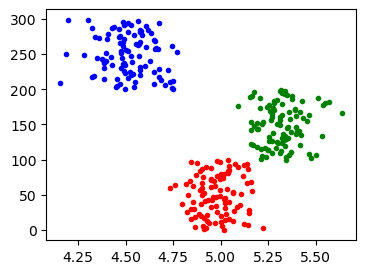

In [12]:
draw_graph(std=0.1)

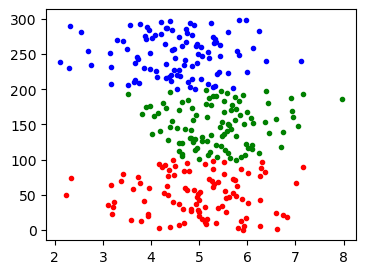

In [13]:
draw_graph(std=1)

#### 4-2.일원분산분석(One-way ANOVA)
- 독립변수 : 범주형 1개, 종속변수 : 연속형
- 독립변수의 변화가 종속변수에 미치는 영향을 보기 위해 사용
- 가정 : 독립성, 정규성, 등분산성
- scipy.stats이나 statsmodel 라이브러리를 이용

In [ ]:
# 예시 데이터 설명
# iris의 target이 0 : 'setosa', 1 : 'versicolor', 2: 'virginica' 품종
# 독립변수 :'sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'   
# 품종별 sepal, petal의 length, width가 차이를 보일까?에 anova 사용

In [14]:
# [1] 데이터 가져오기
import pandas as pd

iris = pd.read_csv('bigdata/iris_data.csv')
iris.columns = ['sepal_length', 'sepal_width', 
                'petal_length', 'petal_width', 'target']
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target'], dtype='object')

In [15]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   target        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [16]:
iris.head(2)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


In [18]:
# [2-1] 품종별 각 변수의 평균 확인
iris.groupby('target').mean()

,sepal_length,sepal_width,petal_length,petal_width
target,,,,
0,5.006,3.428,1.462,0.246
1,5.936,2.770,4.260,1.326
2,6.588,2.974,5.552,2.026


In [19]:
# [2-2] 특정 변수에 대한 품종별 평균 확인
y_feature = 'sepal_length'
iris.groupby('target')[y_feature].mean()

target
0    5.006
1    5.936
2    6.588
Name: sepal_length, dtype: float64

In [ ]:
# group 0, 1, 2의 평균의 차이가 있습니다
# 평균값의 차이가 실제로 의미가 있는 차이인지 알고 싶다면,
# 분산 분석을 통해 통계적 유의성을 알아 볼 수 있습니다.

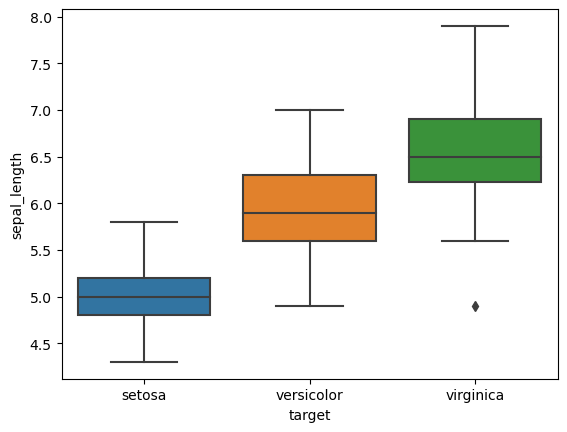

In [24]:
# [3] 그룹 추출 및 그래프로 확인
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.boxplot(data=iris, x='target', y=y_feature)
g.set_xticklabels(['setosa', 'versicolor', 'virginica'])

plt.show()

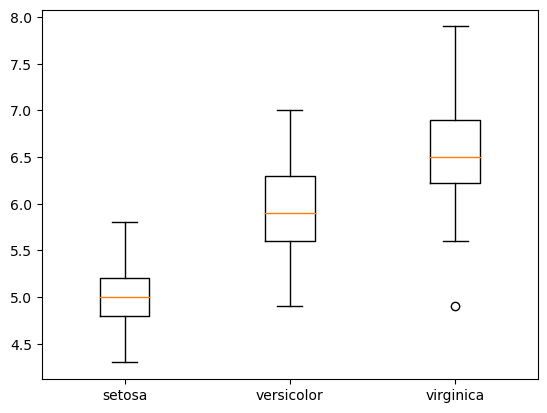

In [26]:
import matplotlib.pyplot as plt

data = [x for _, x in iris.groupby('target')[y_feature]]

plt.boxplot(data, labels=['setosa', 'versicolor', 'virginica'])
plt.show()

In [39]:
# [4] 정규성 확인 
# p-value가 0.05 보다 큰 값일 때 정규성을 갖음
from scipy.stats import shapiro, kstest, normaltest, anderson

data = [x for x in iris.groupby('target')[y_feature]]

for name, x in data:
    s, pvalue = shapiro(x)
    print(f'{name} shapiro [{s:,.4f}], [{pvalue:,.4f}] --> {"H0 기각" if pvalue < 0.05 else "H0 채택"}') 

for name, x in data:
    s, pvalue = kstest(x, 'norm')
    print(f'{name} kstest [{s:,.4f}], [{pvalue:,.4f}] --> {"H0 기각" if pvalue < 0.05 else "H0 채택"}') 

for name, x in data:
    s, pvalue = normaltest(x)
    print(f'{name} normaltest [{s:,.4f}], [{pvalue:,.4f}] --> {"H0 기각" if pvalue < 0.05 else "H0 채택"}') 

for name, x in data:
    r = anderson(x)
    print(f'{name} anderson result= ', *r) 

0 shapiro [0.9777], [0.4595] --> H0 채택
1 shapiro [0.9778], [0.4647] --> H0 채택
2 shapiro [0.9712], [0.2583] --> H0 채택
0 kstest [1.0000], [0.0000] --> H0 기각
1 kstest [1.0000], [0.0000] --> H0 기각
2 kstest [1.0000], [0.0000] --> H0 기각
0 normaltest [0.1942], [0.9075] --> H0 채택
1 normaltest [0.8414], [0.6566] --> H0 채택
2 normaltest [0.2089], [0.9008] --> H0 채택
0 anderson result=  0.4079859754958619 [0.538 0.613 0.736 0.858 1.021] [15.  10.   5.   2.5  1. ]
1 anderson result=  0.360841172628966 [0.538 0.613 0.736 0.858 1.021] [15.  10.   5.   2.5  1. ]
2 anderson result=  0.5516407106574732 [0.538 0.613 0.736 0.858 1.021] [15.  10.   5.   2.5  1. ]


In [38]:
# [5] 등분산성 확인
# p-value가 0.05 보다 큰 값일 때 등분산성을 갖음
from scipy.stats import bartlett, levene, fligner

data = [x for _, x in iris.groupby('target')[y_feature]]

s, pvalue = bartlett(*data)
print(f'bartlett [{s:,.4f}], [{pvalue:,.4f}] --> {"H0 기각" if pvalue < 0.05 else "H0 채택"}') 

s, pvalue = levene(*data)
print(f'levene [{s:,.4f}], [{pvalue:,.4f}] --> {"H0 기각" if pvalue < 0.05 else "H0 채택"}') 

s, pvalue = fligner(*data, center='mean')
print(f'anderson [{s:,.4f}], [{pvalue:,.4f}] --> {"H0 기각" if pvalue < 0.05 else "H0 채택"}') 

bartlett [16.0057], [0.0003] --> H0 기각
levene [6.3527], [0.0023] --> H0 기각
anderson [13.2561], [0.0013] --> H0 기각


In [44]:
data = [x for x in iris.groupby('target')[y_feature]]

for name, x in data:
    print(f'{name} - variance: {x.var():,.4f}')
    
for name, x in data:
    print(f'{name} - mean: {x.mean():,.4f}')

0 - variance: 0.1242
1 - variance: 0.2664
2 - variance: 0.4043
0 - mean: 5.0060
1 - mean: 5.9360
2 - mean: 6.5880


Scipy.stats 으로 일원분산분석
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html

In [45]:
# [6] 일원분산분석 - 1
from scipy.stats import f_oneway

data = [x for _, x in iris.groupby('target')[y_feature]]

fvalue, pvalue = f_oneway(*data)
print(f'[1-way ANOVA] f-value= {fvalue:,.4f}, p-value= {pvalue:,.4f} -> {"H₀기각" if pvalue < 0.05 else "H₀채택"}')

[1-way ANOVA] f-value= 119.2645, p-value= 0.0000 -> H₀기각


pandas 와 statsmodels 를 사용한 일원분산분석
- https://www.statsmodels.org/dev/generated/statsmodels.formula.api.ols.html
- https://www.statsmodels.org/stable/generated/statsmodels.stats.anova.anova_lm.html 

ols (ordinary least squares) 모델 
- 구하려는 해와 실제의 오차의 제곱의 합이 최소가 되는 해를 구하는 방법

'value ~ C(treatment)' : '종속변수 ~ C(독립변수)'
- value : 종속변수
- treatment : 범주형(C)인 독립변수
- df : degree of freedom
- C(treatment)의 df : 그룹의 수 - 1
- Residual의 df : 전체 데이터 수 - 그룹의 수

In [54]:
!pip install statsmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 10.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 kB 8.7 MB/s eta 0:00:00


In [64]:
# [7] 일원분산분석 - 2
from statsmodels.formula.api import ols
import statsmodels.api as sm

model = ols(formula=f'{y_feature} ~ C(target)', data=iris).fit()
result = sm.stats.anova_lm(model, typ=1)
result['H0'] = '채택'
result['H0'] = result['H0'].mask(result['PR(>F)'] < 0.05, '기각')
print(result)

# [1-way ANOVA] f-value= 119.2645, p-value= 0.0000 -> H₀기각

              df     sum_sq    mean_sq           F        PR(>F)  H0
C(target)    2.0  63.212133  31.606067  119.264502  1.669669e-31  기각
Residual   147.0  38.956200   0.265008         NaN           NaN  채택


In [ ]:
# C(target)의 PR(=p-value) 값이 0.05 보다 작으므로 그룹의 
# 평균값이 통계적으로 유의미하게 차이가 있음

In [ ]:
# 구체적으로 어떤 집단이 차이가 있는지 확인하려면 사후분석(post hoc tests)를 해야함
# 유의미한 차이가 없는 경우는 사후분석할 필요가 없음

사후검정(Post Hoc Analysis)
- ANOVA 분석의 문제 : 다르다는 것은 알지만, 어떤 집단간의 차이가 있는지는 알 수 없음
- 사후검정을 통해 어떤 것에 차이가 있는지 찾을 수 있음
- post hoc은 라틴어로 "after this"의 뜻
- 사후검정의 종류
    - Tukey's HSD (Honest Significant Difference) test : 정규분포, 등분산, 동일 표본 크기에서 가장 많이 사용
    - Duncan’s new multiple range test (MRT) : 정규분포, 등분산, 동일 표본 크기에서 사용, 엄격하지 않은 기준으로 통계적 유의성을 도출하기 쉬움
    - Scheffé’s Method : 가장 보수적이고 엄격한 사후검정방식 (동일하지 않은 표본 크기)
- 민감도(sensitivity)로 구분 : Scheffe < Tukey < Duncan
- Duncan의 방법은 작은 차이에도 차이가 난다라고 하지만, Scheffe의 방법은 확실한 차이가 나야만 비로소 차이가 있다라고 판단함


Tukey test
- statsmodels의 Tukey test를 하기 위해서는 DataFrame의 형태를 변경해야 함
- 하나의 컬럼은 분류할수 있는 이름(label)을 다른 컬럼은 실험값(values)를 가지고 있는 형태이어야 함

[참고] scheffe : https://eunholand.tistory.com/96

In [72]:
# [7] 사후 검정
from statsmodels.stats.multicomp import pairwise_tukeyhsd

posthoc_result = pairwise_tukeyhsd(iris[y_feature], iris['target'], alpha=0.05)
print(posthoc_result)

# 0 - mean: 5.0060
# 1 - mean: 5.9360
# 2 - mean: 6.588

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
     0      1     0.93   0.0 0.6862 1.1738   True
     0      2    1.582   0.0 1.3382 1.8258   True
     1      2    0.652   0.0 0.4082 0.8958   True
-------------------------------------------------


In [ ]:
# 결과를 보면 모든 그룹에서 통계적인 유의미성(P-value < 0.05)을 가질 수 있는것을 확인 할 수 있음

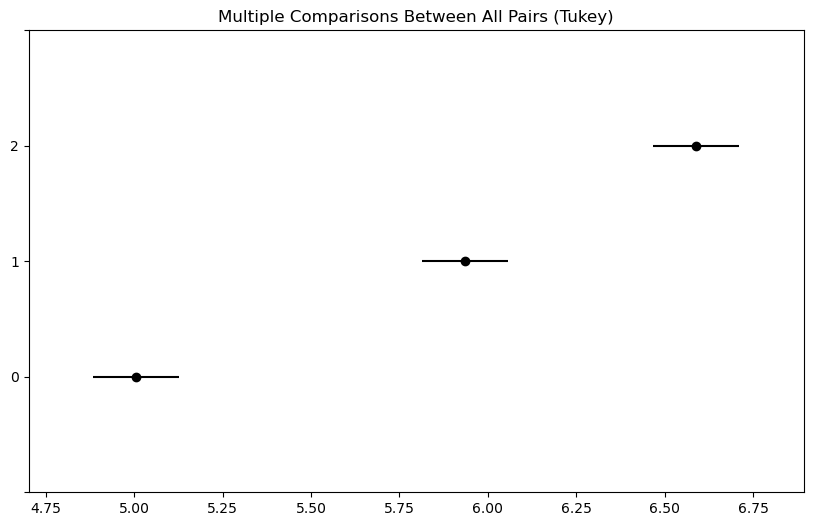

In [73]:
# [8] 그림으로 확인하기
posthoc_result.plot_simultaneous()
plt.show()

In [ ]:
# 통계적 의미 갖지 않는 경우
# 그림에서 볼 수 있듯이, 그룹 1.0과 2.0은 서로 겹치지 않는것을 볼 수 있음
# 반면,1과 3, 2와 3은 겹치기 때문에 유의미한 차이가 없다고 할 수 있음

In [74]:
!pip install scikit_posthocs

In [80]:
from scikit_posthocs import posthoc_scheffe

posthoc_result2 = posthoc_scheffe(iris, val_col=y_feature, group_col='target')
print(posthoc_result2)

              0             1             2
0  1.000000e+00  8.069802e-15  2.657565e-31
1  8.069802e-15  1.000000e+00  1.994818e-08
2  2.657565e-31  1.994818e-08  1.000000e+00


In [ ]:
##  23년 5월 31일 오전 - 여기까지

#### 4-3.이원분산분석(Two-way ANOVA)
- 독립변인의 수가 두 개일 때 집단 간 차이가 유의한지를 검증하는 데 사용
- 상호작용효과(Interaction effect) 즉, 한 변수의 변화가 결과에 미치는 영향이 다른 변수의 수준에 따라 달라지는지를 확인하기 위해 사용됨
- scipy.stats이나 statsmodels 라이브러리를 이용

예제 데이터(altman_12_6) 설명
태아의 머리 둘레 측정 데이터입니다. 
4명의 관측자가 3명의 태아를 대상으로 측정을 했습니다. 
이를 통해서 초음파로 태아의 머리 둘레측정 데이터가 재현성이 있는지를 조사하였습니다.

In [82]:
# [1] 데이터 가져오기
import pandas as pd
data = pd.read_csv('./data_02/altman.csv')
data.tail()

,head_size,fetus,observer
31,12.7,3.0,3.0
32,12.5,3.0,3.0
33,13.0,3.0,4.0
34,12.9,3.0,4.0
35,13.8,3.0,4.0


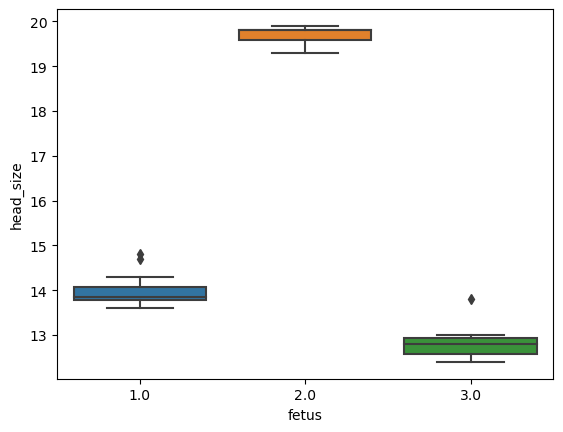

In [85]:
# [2] 태아별 머리 둘레 plot 만들기
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=data, x='fetus', y='head_size')

plt.show()

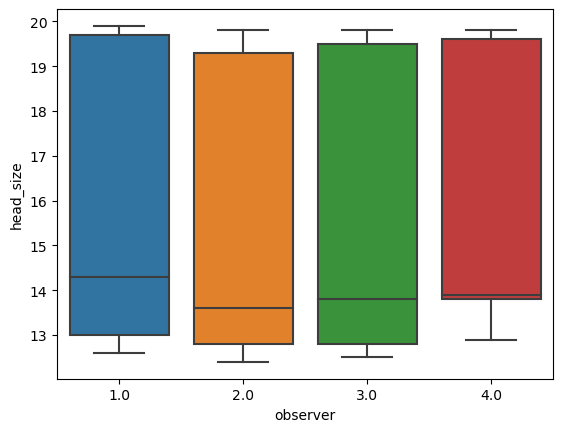

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=data, x='observer', y='head_size')

plt.show()

In [86]:
# [3] 태아별 머리 둘레 평균을 구해봅니다
data.groupby('fetus')['head_size'].mean()

fetus
1.0    13.991667
2.0    19.691667
3.0    12.825000
Name: head_size, dtype: float64

In [ ]:
# 그림에서 태아(fetus) 3명의 머리 둘레는 차이가 있어 보입니다.
# 관측자와 태아에 상호작용 효과 여부를 Two way ANOVA를 통해 알아 보겠습니다

In [ ]:
# 귀무가설 : 관측자별 머리둘레 평균은 동일하다
# 대립가설 : 관측자별 머리둘레 평균은 동일하지 않다 (차이가 있다)

# 귀무가설 : 태아별 머리둘레 평균은 동일하다
# 대립가설 : 태아별 머리둘레 평균은 동일하지 않다 (차이가 있다)

# 귀무가설 : 머리둘레평균에 대해 측정자와 태아에 상호작용 효과가 없다
# 대립가설 : 머리둘레평균에 대해 측정자와 태아에 상호작용 효과가 있다

In [92]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

model = ols(formula='head_size ~ C(observer)', data=data).fit()
r1 = sm.stats.anova_lm(model, typ=1)
print(r1)

model = ols(formula='head_size ~ C(fetus)', data=data).fit()
r2 = sm.stats.anova_lm(model, typ=1)
print(r2)

model = ols(formula='head_size ~ C(observer) * C(fetus)', data=data).fit()
r3 = sm.stats.anova_lm(model, typ=2)
print(r3)

               df      sum_sq    mean_sq         F    PR(>F)
C(observer)   3.0    1.198611   0.399537  0.039169  0.989451
Residual     32.0  326.411111  10.200347       NaN       NaN
            df      sum_sq     mean_sq            F        PR(>F)
C(fetus)   2.0  324.008889  162.004444  1484.697061  4.756231e-33
Residual  33.0    3.600833    0.109116          NaN           NaN
                          sum_sq    df            F        PR(>F)
C(observer)             1.198611   3.0     5.211353  6.497055e-03
C(fetus)              324.008889   2.0  2113.101449  1.051039e-27
C(observer):C(fetus)    0.562222   6.0     1.222222  3.295509e-01
Residual                1.840000  24.0          NaN           NaN


In [ ]:
# C(fetus):C(observer)의 P-value 가 0.05 이상 입니다, 
# 따라서 귀무가설을 기각할 수 없고. 
# 머리둘레평균에 대해 측정자와 태아에 상호작용 효과가 없다
